0.9527582320960933 0.1047 0.02
0.9478952214953675 1.0472 0.02
0.9657813854318015 0.1047 0.03
0.9604754365291872 1.0472 0.03
0.9701653668686232 0.1047 0.039999999999999994
0.9702030844895687 1.0472 0.039999999999999994
0.974708533237505 0.1047 0.049999999999999996
0.9742117105182295 1.0472 0.049999999999999996
0.9786666037932553 0.1047 0.06
0.9775989765749391 1.0472 0.06
0.9804864858947576 0.1047 0.06999999999999999
0.9794540450627811 1.0472 0.06999999999999999
0.9813633281746555 0.1047 0.07999999999999999
0.9803286435942055 1.0472 0.07999999999999999
0.9813130175035989 0.1047 0.09
0.9817580060451542 1.0472 0.09
0.9816291336770788 0.1047 0.09999999999999999
0.9820533754449403 1.0472 0.09999999999999999
0.9815157544501938 0.1047 0.10999999999999999
0.9823666270606028 1.0472 0.10999999999999999
0.9817801577794841 0.1047 0.11999999999999998
0.9809562695004773 1.0472 0.11999999999999998
0.9815516987865545 0.1047 0.12999999999999998
0.9818185061503039 1.0472 0.12999999999999998
0.98093169042

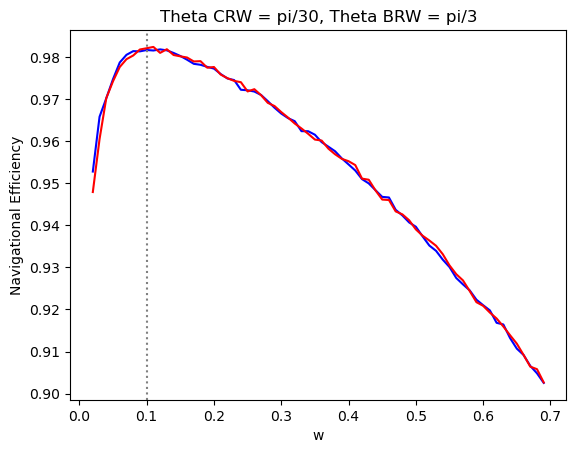

In [130]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import pylab
import statistics

class Random_Walks():
    def random_walks(self):
        N = 500  # no of steps per trajectory
        realizations = 50  # number of trajectories
        v = 1.0  # velocity (step size)

        # the width of the random walk turning angle distribution
                # (the lower it is, the more straight the trajectory will be)
        # theta_s_array = [round(math.pi / 24, 4), round(math.pi / 12, 4), round(math.pi / 3, 4)]
        
        ### for question 2
        theta_s_array = [round(math.pi / 30, 4), round(math.pi / 3, 4)]
        
        # weighting given to the directional bias (hence (1-w) is the weighting given to correlated motion)
        # w_array = [0.0, 0.5, 1.0]
        
        ### for question 2
        w_array = np.arange(0.0, 1.0, 0.01)


        # initial ratio between bias and correlated motion
        ratio_theta_s_brw_crw = 1

        # whether to plot realizations of random walks
        plot_walks = True
        count = 0
        
        
        
        # array of mean nav_eff values for each value of w
        m_navs_w_thirty = [0]* len(w_array)
        m_navs_w_three = [0]* len(w_array)
        
        # TODO: calc navigational efficiency (mean over 50 steps)
        for w_i in range(len(w_array)):
            w = w_array[w_i]            
            for theta_s_i in range(len(theta_s_array)):                        #iterator (0, 1, or 2)
                # array to store nav_effs 
                navs = [0] * 50
                # theta_s_crw = np.multiply(ratio_theta_s_brw_crw, theta_s_array[theta_s_i])
                # theta_s_brw = theta_s_array[theta_s_i]
                
                ### question 2
                theta_s_crw = round(math.pi / 30, 4)
                theta_s_brw = round(math.pi / 3, 4)
                x, y = self.BCRW(N, realizations, v, theta_s_crw, theta_s_brw, w, navs)
                
                # if plot_walks:
                #     count += 1
                #     plt.figure(count)
                #     plt.plot(x.T, y.T)
                #     plt.xlabel('X pos')
                #     plt.ylabel('Y pos')
                #     plt.title('{} realizations of BCRW: w={}, theta_c={}, theta_b={}'.format(
                #         realizations, w, theta_s_crw, theta_s_brw))
                #     plt.axis('equal')
                # plt.show()
                
                print (statistics.mean(navs), theta_s_array[theta_s_i], w_array[w_i])
                
                if theta_s_i == 0:
                    m_navs_w_thirty[w_i] = statistics.mean(navs)
                if theta_s_i == 1:
                    m_navs_w_three[w_i] = statistics.mean(navs)
                
                
                
            ### Question 1 nav_eff plots
            
                color = 'red'
                
                if (theta_s_i == 1):
                    color = 'blue'
                if (theta_s_i == 2):
                    color = 'green'

                reps = np.array(range(0,50))

                plt.scatter(reps, navs, c= color)

                plt.ylabel("Navigational Efficiency")
                plt.xlabel("Repetition")
                
                # plt.title("Navigational Efficiency for BCRW")
                plt.title('{} realizations of BCRW: w={}'.format(realizations, w))
                
            plt.legend( ["w = 0.0", "w = 0.5", "w = 1.0", 'red', 'blue', 'green'],  ncol = 1 , loc = "upper left" ,bbox_to_anchor =(1, 0.6) )    
            plt.legend( ["theta = pi/24", "theta = pi/12", "theta = pi/3", 'red', 'blue', 'green'],  
                       ncol = 1 , loc = "upper left" ,bbox_to_anchor =(1, 0.6))     
            
            plt.show()

        
    ### Question 2 Plot
        # max_value_thi = max(m_navs_w_thirty)
        # max_value_thr = max(m_navs_w_three)
        
    # plot nav_eff array over range of w array
        plt.figure
        plt.plot(w_array, m_navs_w_thirty, c='blue')
        plt.plot(w_array, m_navs_w_three, c='red')
        plt.axvline(0.1, color='gray', linestyle = 'dotted')
        # plt.scatter(0.1, max_value_thr, c='black')
        # plt.scatter(w_array[index_thr], max_value_thr, c='black')
        plt.xlabel('w')
        plt.ylabel('Navigational Efficiency')
        plt.title("Theta CRW = pi/30, Theta BRW = pi/3")
        plt.show()

        

        

    # The function generates 2D-biased correlated random walks
    # for BRW, w = 1, for CRW, w = 0
    def BCRW(self, N, realizations, v, theta_s_crw, theta_s_brw, w, navs):
        X = np.zeros([realizations, N])   # 50(tall) x 500(long) matrix of zeros
        Y = np.zeros([realizations, N])
        theta = np.zeros([realizations, N])
        X[:, 0] = 0  # 0'th column 
        Y[:, 0] = 0
        theta[:, 0] = 0  # theta_0 direction (positive x)

        for realization_i in range(realizations):  # 0 thorugh 50 repitions, one nav_eff for each
            #  Navigational efficiency = (distance traveled in theta direction) / (total distance traveled)
            nav_eff = 0   # navigational efficiency
            d_theta = 0   # current position
            d_total = 0   # total distance
                
            for step_i in range(1, N):    # 0 through 500 steps per repitition
                theta_crw = theta[realization_i][step_i - 1] + (theta_s_crw * 2.0 * (np.random.rand(1, 1) - 0.5))
                theta_brw = (theta_s_brw * 2.0 * (np.random.rand(1, 1) - 0.5))

                X[realization_i, step_i] = X[realization_i][step_i - 1] + (v * (w * math.cos(theta_brw))) + (
                            (1 - w) * math.cos(theta_crw))
                Y[realization_i, step_i] = Y[realization_i][step_i - 1] + (v * (w * math.sin(theta_brw))) + (
                            (1 - w) * math.sin(theta_crw))

                current_x_disp = X[realization_i][step_i] - X[realization_i][step_i - 1]
                current_y_disp = Y[realization_i][step_i] - Y[realization_i][step_i - 1]
                current_direction = math.atan2(current_y_disp, current_x_disp)
                
                d_total += math.sqrt((current_x_disp**2) + (current_y_disp**2))

                if (step_i == 499):
                    # d_theta = math.sqrt(X[realization_i, step_i]**2 + Y[realization_i, step_i]**2)
                    
                    # calculate navigational efficience using the x direction 
                    d_theta = X[realization_i, step_i]
                    nav_eff = d_theta / d_total
                    #add to array
                    navs[realization_i] = nav_eff
                    
                theta[realization_i, step_i] = current_direction

        return X, Y


rdm_plt = Random_Walks()
rdm_plt.random_walks()


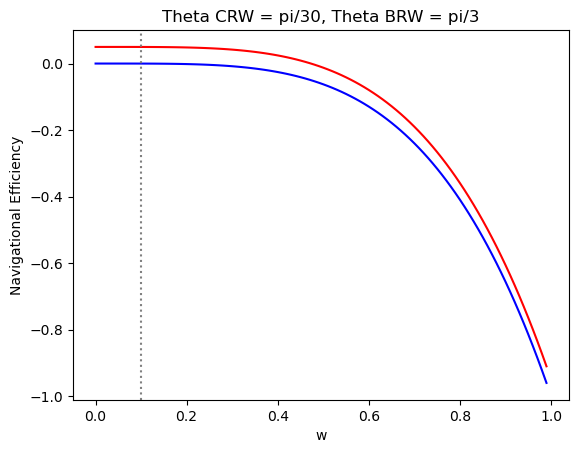

In [129]:

w_array = np.arange(0.0, 1.0, 0.01)
m = -(w_array)**4
m_n = m + 0.05

plt.figure
plt.plot(w_array, m, c='blue')
plt.plot(w_array, m_n, c='red')
plt.axvline(0.1, color='gray', linestyle = 'dotted')
# plt.scatter(0.1, max_value_thr, c='black')
# plt.scatter(w_array[index_thr], max_value_thr, c='black')
plt.xlabel('w')
plt.ylabel('Navigational Efficiency')
plt.title("Theta CRW = pi/30, Theta BRW = pi/3")
# plt.legend( ["theta = pi/30", "theta = pi/3", 'blue', 'red'],  
#            ncol = 1 , loc = "upper left" ,bbox_to_anchor =(1, 0.6))
plt.show()